#Stochastic calculus

We simulate 1000 Wiener processes and approximate the integral a(t) * Xt * dt + b(t) * Xt * dWt with the trapezoidal rule. Then we check the distribution to see the convergence and the distribution the integral and the stohatic processes follows.

Valor esperado de la distribución de la integral: 6.3627273859921845
Varianza de la distribución de la integral: 3.6048874037042715




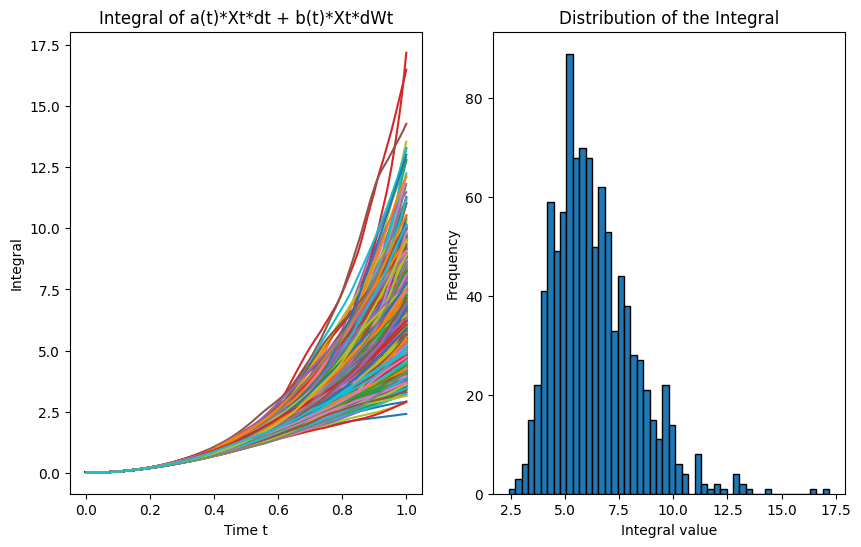

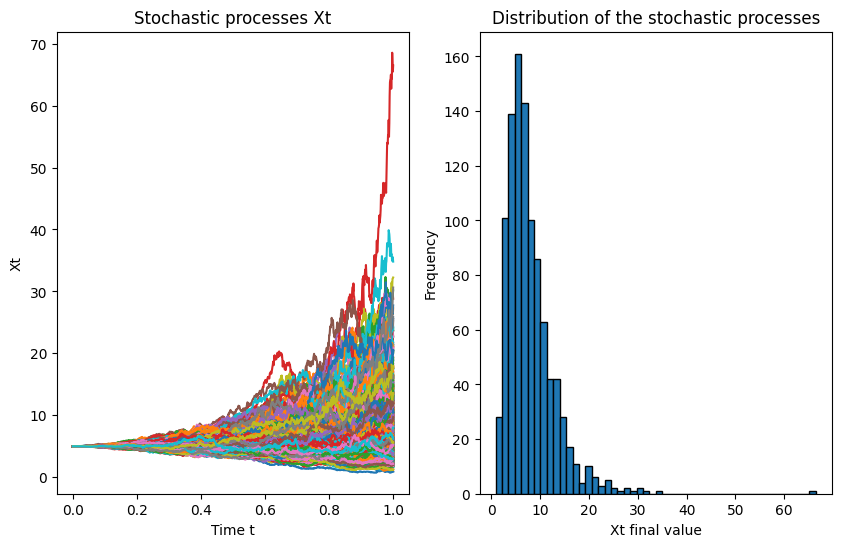

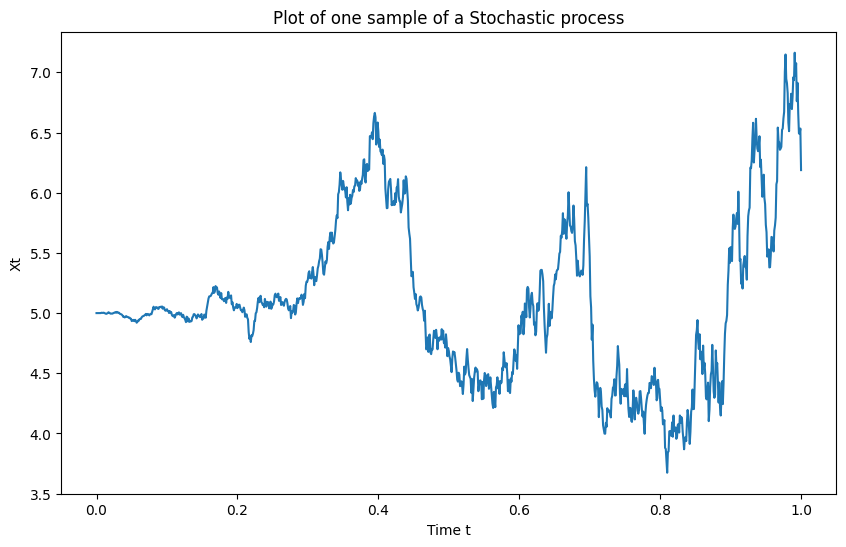

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12)
def a(t):
    return t

def b(t):
    return t # 5t da algo  bastante raro

def simulate_stochastic_process_and_integral(X0, T, dt, a, b):
    N = int(T/dt)
    t = np.linspace(0, T, N+1)
    Xt = np.zeros(N+1)
    Xt[0] = X0

    Ito_integral = np.zeros(N+1)
    normal_integral = np.zeros(N+1)
    Integral = np.zeros(N+1)

    dW = np.random.normal(0, np.sqrt(dt), N)

    for i in range(1, N+1):
        dXt = a(t[i-1]) * Xt[i-1] * dt + b(t[i-1]) * Xt[i-1] * dW[i-1]
        Xt[i] = Xt[i-1] + dXt

        Ito_integral[i] = Ito_integral[i-1] + 0.5 * (b(t[i-1]) * Xt[i-1] + b(t[i]) * Xt[i]) * dt
        normal_integral[i] = normal_integral[i-1] + 0.5 * (a(t[i-1]) * Xt[i-1] + a(t[i]) * Xt[i]) * dt
        Integral[i] = normal_integral[i] + Ito_integral[i]

    return t, Xt, normal_integral, Ito_integral, Integral


def plot_integrals(integral, t,axs):
    axs.plot(t, integral)


final_values = []
final_values_Xt = []

fig, axs = plt.subplots(1,2,figsize=(10,6))
fig, axis = plt.subplots(1,2,figsize=(10,6))

for i in range(0, 1000):
    X0 = 5.0
    T = 1.0
    dt = 0.001
    t, Xt, normal_integral, Ito_integral,Integral = simulate_stochastic_process_and_integral(X0, T, dt, a, b)
    plot_integrals(Integral, t,axs[0])
    final_values.append(Integral[-1])

    plot_integrals(Xt, t, axis[0])
    final_values_Xt.append(Xt[-1])

axs[0].set_title('Integral of a(t)*Xt*dt + b(t)*Xt*dWt')
axs[0].set_xlabel('Time t')
axs[0].set_ylabel('Integral')

axis[0].set_title('Stochastic processes Xt')
axis[0].set_xlabel('Time t')
axis[0].set_ylabel('Xt')



axs[1].hist(final_values, bins=50, edgecolor='black')
axs[1].set_title('Distribution of the Integral')
axs[1].set_xlabel('Integral value')
axs[1].set_ylabel('Frequency')

axis[1].hist(final_values_Xt, bins=50, edgecolor='black')
axis[1].set_title('Distribution of the stochastic processes')
axis[1].set_xlabel('Xt final value')
axis[1].set_ylabel('Frequency')

mean_value = np.mean(final_values)
variance_value = np.var(final_values)

print("Valor esperado de la distribución de la integral:", mean_value)
print("Varianza de la distribución de la integral:", variance_value)
print("\n")

plt.figure(figsize=(10,6))
plt.title('Plot of one sample of a Stochastic process')
plt.xlabel('Time t')
plt.ylabel('Xt')
plt.plot(t, Xt)

plt.show()
